# Creating feature extractors from ViT backbones

In [1]:
from models import VORTEX

## Define the backbone according to models available in 'timm'
backbone = 'beitv2_base_patch16_224.in1k_ft_in22k_in1k'
input_size = 224 # input size must be fixed according to the selected ViT backbone

feature_extractor = VORTEX(backbone, input_size)

##### Extracting features from a given texture image

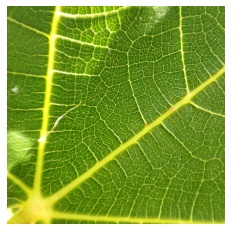

Features:  torch.Size([1, 768])
tensor([[-2.1798e-01, -7.8141e-02, -8.8598e-02, -8.9854e-02,  1.8729e-01,
          1.0471e-01, -1.4748e-02, -1.6792e-01, -2.6572e-02, -1.5197e-01,
         -1.8782e-02, -3.8546e-02, -1.5983e-02,  1.2904e-01,  1.8459e-01,
          1.5841e-01, -4.5731e-02, -1.6548e-01,  1.7560e-01,  4.8855e-02,
          6.7344e-02, -4.7397e-02,  2.7249e-02, -6.0403e-02, -1.3663e-01,
          6.3479e-02,  1.0888e-01,  6.8796e-02, -3.4234e-02,  4.3159e-02,
         -1.4646e-01, -1.7196e-01, -1.0100e-01,  8.7742e-02, -1.6944e-01,
         -1.5839e-01, -9.1805e-02, -1.2544e-01, -2.3258e-01, -1.4858e-02,
         -2.2563e-02, -1.2529e-01,  6.5183e-02,  5.2992e-02, -1.5571e-01,
         -3.8523e-03,  1.6695e-01,  5.5305e-02,  7.6720e-02,  8.3997e-02,
          2.0718e-03,  8.1603e-02, -1.9717e-01, -1.0797e-01, -1.3568e-01,
          8.3272e-02, -1.3045e-01, -9.7732e-02,  9.7225e-02,  9.8402e-02,
         -1.5762e-01,  1.5420e-01, -2.1239e-02, -3.4128e-02, -1.2864e-01,
      

In [3]:
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

## Load an image
image_path = "figures/texture_sample.jpg"  # Replace with your image path
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off') 
plt.show()

# Resize to the backbone's input size, imagenet normalizaztion, and convert to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
    transforms.Resize((input_size, input_size)),
])
image_tensor = transform(image)

features = feature_extractor(image_tensor.unsqueeze(0))
print('Features: ', features.shape)
print(features)